# Project 1: Happy Customers

#### Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

#### Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

#### Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data import and display
df = pd.read_csv("ACME-HappinessSurvey2020.csv")

df.head(10)

Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5
5  1   5   5   3   5   5   5
6  0   3   1   2   2   1   3
7  1   5   4   4   4   4   5
8  0   4   1   4   4   4   4
9  0   4   4   4   2   5   5

In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
# check for missing values
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

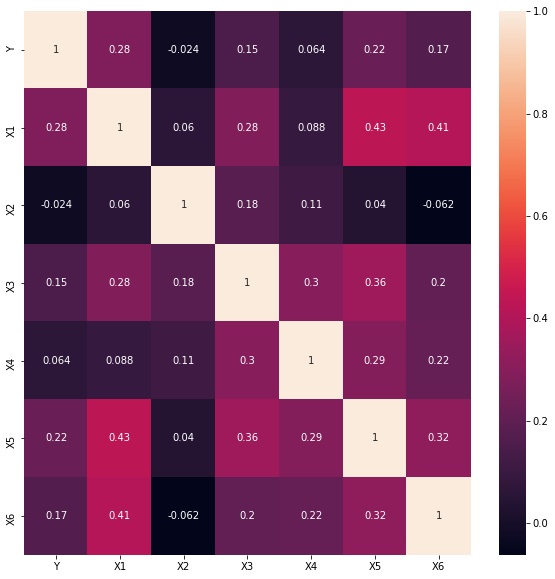

In [5]:
# correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

 X2 and X4 columns will be droped as they don't provide significance to the target Y

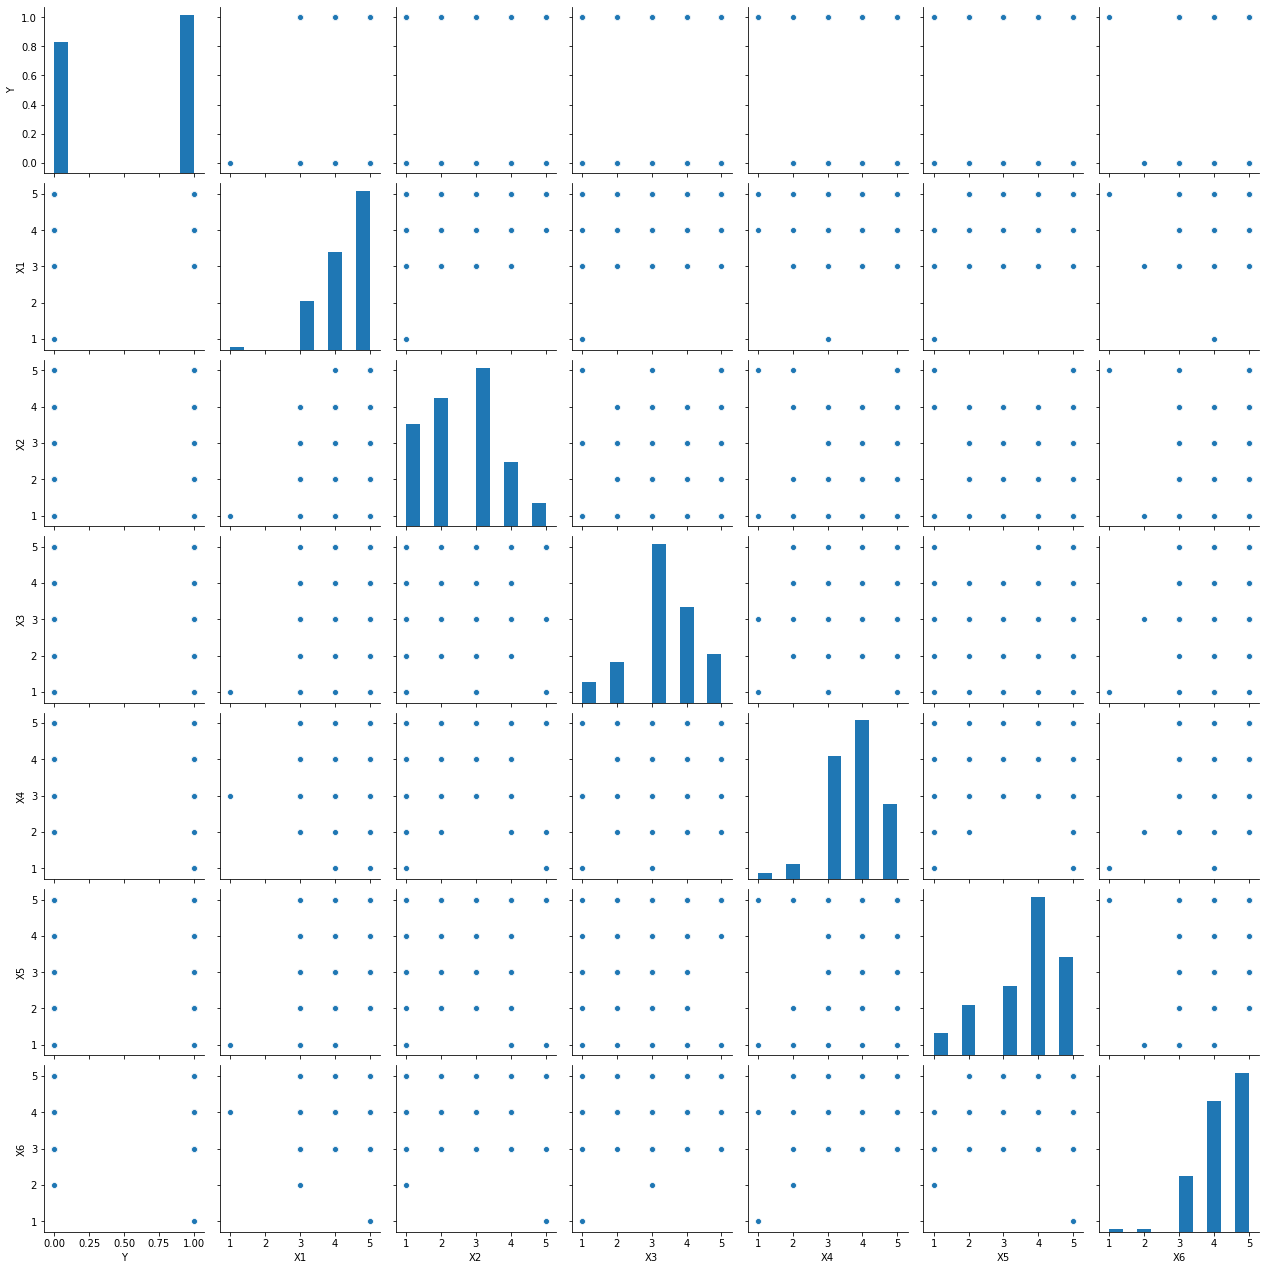

In [19]:
# pairplot
sns.pairplot(df)

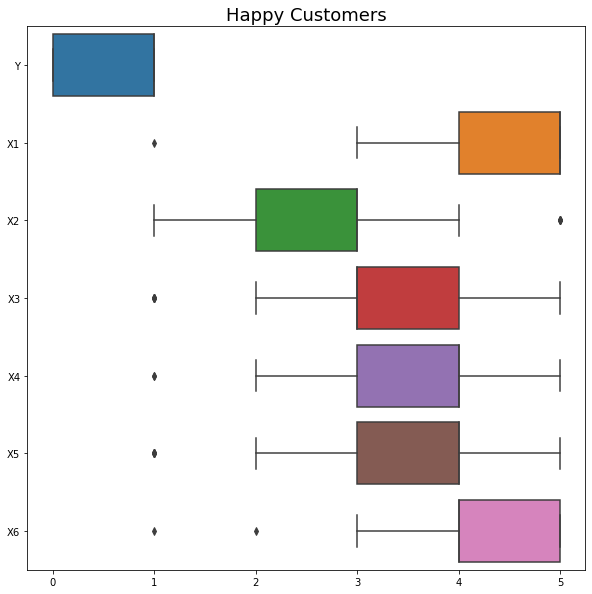

In [6]:
# box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, orient="h")
ax.set_title('Happy Customers', fontsize=18)
plt.show()

In [7]:
# labels and targets (X2 and X4 columns were droped as they don't provide significance to the target)
X = df.drop(["Y", "X2", "X4"], axis=1)
y = df["Y"]

In [8]:
# check for imbalance
y.value_counts()

1    69
0    57
Name: Y, dtype: int64

In [9]:
# basic statistics
X.describe()

X1          X3          X5          X6
count  126.000000  126.000000  126.000000  126.000000
mean     4.333333    3.309524    3.650794    4.253968
std      0.800000    1.023440    1.147641    0.809311
min      1.000000    1.000000    1.000000    1.000000
25%      4.000000    3.000000    3.000000    4.000000
50%      5.000000    3.000000    4.000000    4.000000
75%      5.000000    4.000000    4.000000    5.000000
max      5.000000    5.000000    5.000000    5.000000

In [10]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X.shape, X_train.shape, X_test.shape)

(126, 4) (100, 4) (26, 4)


In [11]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# Linear regression
lrc = LogisticRegression(random_state=42, max_iter=10000)
lrc.fit(X_train, y_train)
lrc_pred = lrc.predict(X_test)

# SVC
svc = SVC(kernel="rbf", probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Decesion Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

# Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# XGB Classifier
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train, verbose=True)
xgbc_pred = xgbc.predict(X_test)

# Gradiend Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)


In [12]:
# ML evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
# Logistic regression
print("Accuracy:", accuracy_score(y_test, lrc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(lrc_pred, y_test))

Accuracy: 0.6153846153846154 

Confusion matrix:  
 [[ 4  2]
 [ 8 12]]


In [14]:
# SVC
print("Accuracy:", accuracy_score(y_test, svc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(svc_pred, y_test))

Accuracy: 0.6923076923076923 

Confusion matrix:  
 [[ 8  4]
 [ 4 10]]


In [15]:
# Decesion Tree
print("Accuracy:", accuracy_score(y_test, dtc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(dtc_pred, y_test))

Accuracy: 0.6153846153846154 

Confusion matrix:  
 [[8 6]
 [4 8]]


In [16]:
# Random Forest
print("Accuracy:", accuracy_score(y_test, rfc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(rfc_pred, y_test))

Accuracy: 0.7307692307692307 

Confusion matrix:  
 [[ 7  2]
 [ 5 12]]


In [17]:
# XGB Classifier
print("Accuracy:", accuracy_score(y_test, xgbc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(xgbc_pred, y_test))

Accuracy: 0.6153846153846154 

Confusion matrix:  
 [[7 5]
 [5 9]]


In [18]:
# Gradient Boosting Classifier
print("Accuracy:", accuracy_score(y_test, gbc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(gbc_pred, y_test))

Accuracy: 0.6923076923076923 

Confusion matrix:  
 [[ 7  3]
 [ 5 11]]


#### Among all models Random Forest provided better accuracy reaching accuracy of 0.73

It also was found that based on correlation coefficients X2 and X4 are not important features when predicting a customer’s happiness. Therefore, they were removed from the analysis